# Importing Packages

In [116]:
import numpy as np
import pandas as pd
import matplotlib as mlp
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [117]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)

# Importing dataset

In [118]:
df=pd.read_csv("2014 and 2015 CSM dataset.csv",error_bad_lines=False)
df.head()

b'Skipping line 233: expected 14 fields, saw 15\n'


,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014,6.3,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0


# Describing Dataset

In [119]:
#need to remove movies as it's a string value and is of no use to us
df=df.drop(["Movie"],axis=1)

In [120]:
df.describe()

,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
count,231.000000,231.000000,231.000000,2.310000e+02,2.300000e+02,221.000000,231.000000,231.000000,2.310000e+02,231.000000,231.000000,231.000000,1.960000e+02
mean,2014.294372,6.441558,5.359307,6.806603e+07,4.792173e+07,2209.244344,1.359307,2.809524,3.712851e+06,12732.536797,679.051948,1825.701299,3.038193e+06
std,0.456750,0.988765,4.141611,8.890289e+07,5.428825e+07,1463.767755,0.967241,6.996775,4.511104e+06,28825.484481,1243.929481,3571.040447,4.886278e+06
min,2014.000000,3.100000,1.000000,2.470000e+03,7.000000e+04,2.000000,1.000000,-38.000000,6.980000e+02,1.000000,0.000000,0.000000,1.066000e+03
25%,2014.000000,5.800000,1.000000,1.030000e+07,9.000000e+06,449.000000,1.000000,0.000000,6.233020e+05,1776.500000,105.500000,248.500000,1.830250e+05
50%,2014.000000,6.500000,3.000000,3.740000e+07,2.800000e+07,2777.000000,1.000000,0.000000,2.409338e+06,6096.000000,341.000000,837.000000,1.052600e+06
75%,2015.000000,7.100000,8.000000,8.935000e+07,6.500000e+07,3372.000000,1.000000,5.500000,5.217380e+06,15247.500000,697.500000,2137.000000,3.694500e+06
max,2015.000000,8.700000,15.000000,6.430000e+08,2.500000e+08,4324.000000,7.000000,29.000000,3.262678e+07,370552.000000,13960.000000,38363.000000,3.103000e+07


In [121]:
display(df.isnull().sum())

Year                    0
Ratings                 0
Genre                   0
Gross                   0
Budget                  1
Screens                10
Sequel                  0
Sentiment               0
Views                   0
Likes                   0
Dislikes                0
Comments                0
Aggregate Followers    35
dtype: int64

In [122]:
Scr=df["Screens"]
df["Screens"]=Scr.fillna(Scr.mean())
Agg=df["Aggregate Followers"]
df["Aggregate Followers"]=Agg.fillna(Agg.mean())
bdg=df["Budget"]
df["Budget"]=bdg.fillna(bdg.mean())

In [123]:
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)

In [124]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                     1.0
Ratings                 13.0
Genre                    6.0
Gross                  108.0
Budget                  44.0
Screens                100.0
Sequel                   0.0
Sentiment                5.5
Views                  115.0
Likes                  114.0
Dislikes               102.0
Comments               109.0
Aggregate Followers     82.0
dtype: float64


# Exploring Data Set

In [125]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(175, 13)

In [126]:
#Thought about taking Aggregate followers as target
label=df["Aggregate Followers"]
df=df.drop(["Aggregate Followers"],axis=1)

In [127]:
label.describe()

count    175.000000
mean      98.320000
std       50.608713
min        0.000000
25%       55.500000
50%      110.000000
75%      137.000000
max      188.000000
Name: Aggregate Followers, dtype: float64

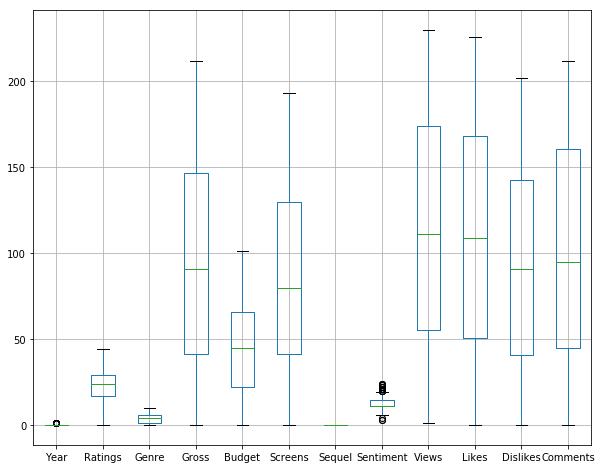

In [128]:
df.boxplot()

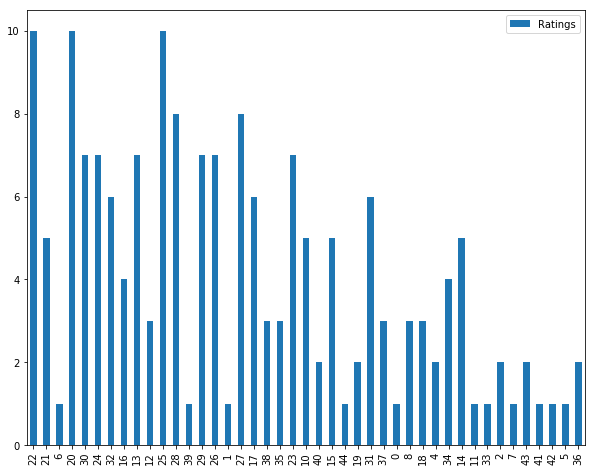

In [129]:
import numpy as np
from collections import Counter
state_counts = Counter(df['Ratings'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.columns = ['Ratings']
df_state.plot(kind='bar')

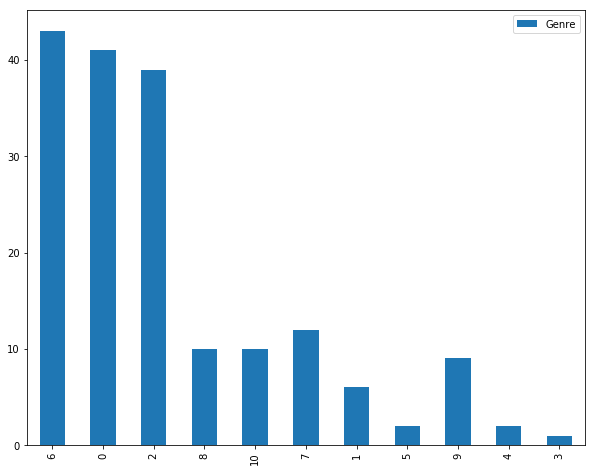

In [130]:
import numpy as np
from collections import Counter
state_counts = Counter(df['Genre'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.columns = ['Genre']
df_state.plot(kind='bar')

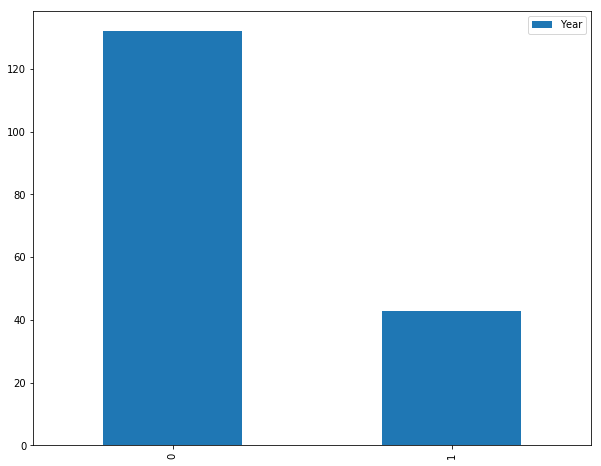

In [131]:
import numpy as np
from collections import Counter
state_counts = Counter(df['Year'])
df_state = pd.DataFrame.from_dict(state_counts, orient='index')
df_state.columns = ['Year']
df_state.plot(kind='bar')

In [132]:
df.dtypes

Year         int32
Ratings      int32
Genre        int32
Gross        int32
Budget       int32
Screens      int32
Sequel       int32
Sentiment    int32
Views        int32
Likes        int32
Dislikes     int32
Comments     int32
dtype: object

In [133]:
df.isnull().sum()

Year         0
Ratings      0
Genre        0
Gross        0
Budget       0
Screens      0
Sequel       0
Sentiment    0
Views        0
Likes        0
Dislikes     0
Comments     0
dtype: int64

# Splitting the data for Train and Test

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size = 0.2, random_state = 14)

### Rescaling the Features 

In [135]:
from sklearn.preprocessing import MinMaxScaler

In [136]:
scaler = MinMaxScaler()

In [137]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Ratings', 'Genre', 'Gross', 'Budget', 'Screens','Sequel','Sentiment','Views','Likes','Dislikes','Comments']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [138]:
X_train.head()

,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments
194,1,0.795455,0.0,0.504717,0.19,0.331606,0.0,0.904762,0.506550,0.535398,0.410891,0.561321
85,0,0.090909,1.0,0.617925,0.19,0.367876,0.0,0.190476,0.951965,0.911504,0.930693,0.915094
86,0,0.704545,0.6,0.712264,0.67,0.746114,0.0,1.000000,0.458515,0.380531,0.584158,0.410377
71,0,0.500000,0.6,0.108491,0.40,0.124352,0.0,0.380952,0.113537,0.137168,0.099010,0.117925
177,1,0.727273,0.0,0.816038,0.71,0.886010,0.0,0.380952,0.825328,0.836283,0.727723,0.669811


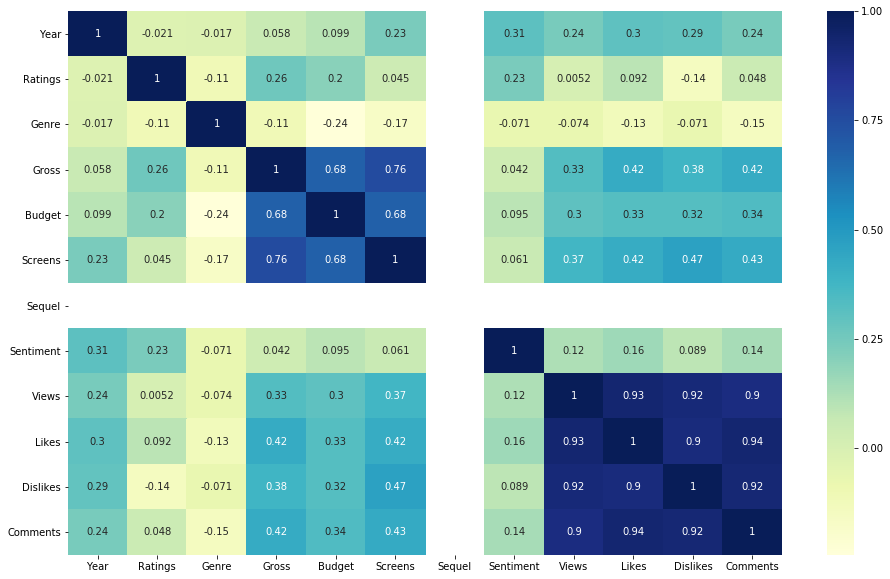

In [139]:
import seaborn as sns
plt.figure(figsize = (16, 10))
sns.heatmap(X_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, 'comments' seems to the correlated to 'likes' the most(0.94) . Let's see a pairplot for 'comments' vs 'likes'.

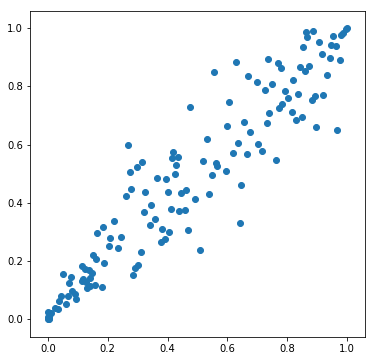

In [140]:
plt.figure(figsize=[6,6])
plt.scatter(X_train.Comments, X_train.Likes)
plt.show()

 We can take our new input feature as 'comments' and target to be 'likes'

In [141]:
#A is our new input feature and b our new target 
A = df.Comments
b = df.Likes
A=A.reshape(-1,1)

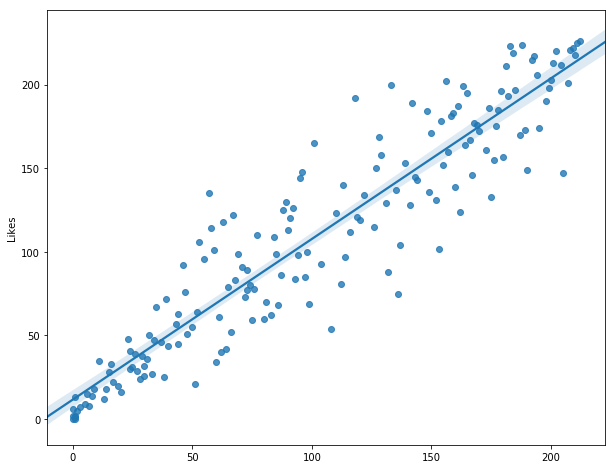

In [142]:
sns.regplot(A, b)

In [143]:
# splitting the data for train and test
from sklearn.model_selection import train_test_split
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size = 0.2, random_state = 14)

In [144]:
classifier = LinearRegression()
classifier.fit(A_train, b_train)
b_pred2 = classifier.predict(A_test)

In [145]:
accuracy1=classifier.score(A_test,b_test)
print(accuracy1*100,'%')

82.186374367946 %


We see that the accuracy score for our model is around 82%

In [146]:
prediction_table = pd.DataFrame({"Actual":b_test,"Predicted":b_pred2})
print(prediction_table)

     Actual   Predicted
20      181  164.556141
32      198  204.450658
90       51   57.522072
210     158  136.338069
146     102  159.690956
25      139  166.502215
220     187  167.475252
201     146  173.313474
67      106   62.387257
60       91   79.901923
82      218  215.154065
218     217  198.612436
9       148  104.227848
138      77   81.847997
64       15   16.654519
160      48   33.196148
179      92   55.575998
8        61   70.171553
224     143  150.933623
159      46   46.818665
186     144  103.254811
122      59   83.794071
152     185  184.016881
40       88  139.257180
109      21   60.441183
56      133  181.097770
123      80   82.821034
117     171  156.771845
139      45   53.629924
30       81  119.796440
95       79   74.063701
99        7   13.735408
155     176  175.259548
5        13   11.789334
23      134  129.526810


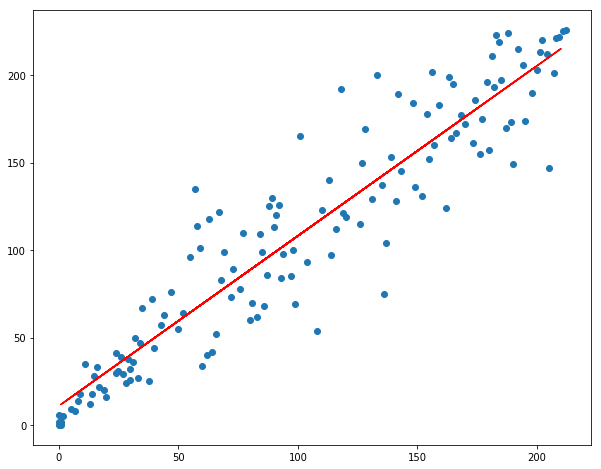

In [147]:
#Plotting of Regression Model

plt.scatter(A_train, b_train)

plt.plot(A_test,b_pred2,'r')
plt.show()

In [148]:
#Evaluation Metrics
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(b_test, classifier.predict(A_test)))
print('MAE:', metrics.mean_absolute_error(b_test, classifier.predict(A_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(b_test, classifier.predict(A_test))))

MSE: 648.482864988731
MAE: 19.039162190722788
RMSE: 25.465326720635865


Since we have so many features, we can clearly do better than this. So let's go ahead and add the second most highly correlated variable, i.e. views (0.93) as seen from the heatmap

In [149]:
A2 = df[['Views', 'Comments']]

In [150]:
from sklearn.model_selection import train_test_split
A_train1, A_test1, b_train, b_test = train_test_split(A2, b, test_size = 0.2, random_state = 14)

In [151]:
classifier.fit(A_train1, b_train)
b_pred3 = classifier.predict(A_test1)

In [152]:
accuracy2=classifier.score(A_test1,b_test)
print(accuracy2*100,'%')

91.0576792886927 %


We can see that we have a better accuracy after adding another feature. Now , let's have our model see the actual and predicted values and plot our linear regression.

In [153]:
prediction_table = pd.DataFrame({"Actual":b_test,"Predicted":b_pred3})
print(prediction_table)

     Actual   Predicted
20      181  181.099847
32      198  204.807729
90       51   43.942206
210     158  143.727074
146     102  148.421322
25      139  146.717465
220     187  169.071100
201     146  167.818600
67      106   69.342541
60       91   84.023118
82      218  219.736524
218     217  208.001080
9       148  135.816844
138      77   93.795082
64       15   20.200468
160      48   47.947928
179      92   62.797785
8        61   87.081044
224     143  165.099058
159      46   51.333190
186     144  132.386500
122      59   66.205676
152     185  185.658671
40       88  124.905351
109      21   39.676861
56      133  171.000724
123      80   82.183836
117     171  174.036021
139      45   65.641348
30       81   82.499944
95       79   68.293177
99        7    8.453797
155     176  185.839178
5        13   12.267785
23      134  143.975293


In [154]:
print('MSE:', metrics.mean_squared_error(b_test, classifier.predict(A_test1)))
print('MAE:', metrics.mean_absolute_error(b_test, classifier.predict(A_test1)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(b_test, classifier.predict(A_test1))))

MSE: 325.5340532183386
MAE: 13.330568246149584
RMSE: 18.042562268656262


With the reduction in MSE we can know that our model performs better with the addition of the new input feature

We can basically keep using the heatmap and add highly correlated values but also our input features should make sense in determining our target.It is lkely that the user 'comments' and 'views' play a key role in determining the 'likes'.

Making sure we hit off all the parts of check list :-

1) Looked at the Bigeer Problem 
2) Got the Data (imported)
3) Explored the data to gain Insights 
4) Prepared the data to expose the underlying data patterns to Machine Learning Algorithm
5) Explored Linear Regression and found it was accurate enough to add a feautre and gain better insights.
6) Fine Tuned the model 
7) Presented the Solution